In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df = pd.read_csv("Spotify_Song_Attributes.csv") #load the CSV file here
#df.info
df.columns

Index(['trackName', 'artistName', 'msPlayed', 'genre', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [ ]:
#print(df.head())
print(df.time_signature)


0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
10075    3.0
10076    NaN
10077    4.0
10078    4.0
10079    3.0
Name: time_signature, Length: 10080, dtype: float64


In [ ]:
print(df.describe())


           msPlayed  danceability       energy          key     loudness  \
count  1.008000e+04   9530.000000  9530.000000  9530.000000  9530.000000   
mean   1.519657e+06      0.602469     0.563524     5.241973    -8.685077   
std    5.317343e+06      0.157745     0.243548     3.570615     5.414814   
min    0.000000e+00      0.000000     0.001080     0.000000   -42.044000   
25%    1.367800e+05      0.509000     0.403000     2.000000   -10.189000   
50%    2.662875e+05      0.623000     0.589000     5.000000    -7.218000   
75%    1.186307e+06      0.714000     0.751000     8.000000    -5.336000   
max    1.583671e+08      0.976000     0.999000    11.000000     3.010000   

              mode  speechiness  acousticness  instrumentalness     liveness  \
count  9530.000000  9530.000000   9530.000000       9530.000000  9530.000000   
mean      0.612382     0.078468      0.362924          0.153215     0.174589   
std       0.487232     0.080101      0.334337          0.313132     0.13074

In [2]:
print(df.dtypes)


trackName            object
artistName           object
msPlayed              int64
genre                object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms         float64
time_signature      float64
dtype: object


In [3]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_info)


                  Missing Values  Percentage
trackName                      0    0.000000
artistName                     0    0.000000
msPlayed                       0    0.000000
genre                       1500   14.880952
danceability                 550    5.456349
energy                       550    5.456349
key                          550    5.456349
loudness                     550    5.456349
mode                         550    5.456349
speechiness                  550    5.456349
acousticness                 550    5.456349
instrumentalness             550    5.456349
liveness                     550    5.456349
valence                      550    5.456349
tempo                        550    5.456349
type                         550    5.456349
id                           550    5.456349
uri                          550    5.456349
track_href                   550    5.456349
analysis_url                 550    5.456349
duration_ms                  550    5.456349
time_signa

# **Below cell is for Dropping missing values**

In [4]:
# Dropping of the missing values
df_cleaned = df.copy()

df_cleaned.dropna(inplace=True)
missing_values = df_cleaned.isnull().sum()
print(missing_values)

trackName           0
artistName          0
msPlayed            0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64


##***Removing Duplicate Rows***

In [19]:
import pandas as pd


# Find duplicate rows and count occurrences
duplicate_counts = df_cleaned[df_cleaned.duplicated(keep=False)].groupby(list(df.columns)).size().reset_index(name='Count')

# Display the duplicate rows and their counts
print(duplicate_counts)


                                              trackName  \
1     "In The Hall Of The Mountain King" from Peer G...   
2                                    #BrooklynBloodPop!   
3                                                   $10   
4                            (I Just) Died In Your Arms   
5                                         (L)only Child   
...                                                 ...   
5034                                            Younger   
5035                                 Younger with Time.   
5037                Your Love Is My Drug (8 Bit Slowed)   
5038                                         Your Power   
5039                            Your Voice / Bethel, NY   

                     artistName  msPlayed              genre  danceability  \
1     London Symphony Orchestra   1806234  british orchestra         0.475   
2                          SyKo    145610         glitchcore         0.691   
3                  Good Morning     25058   experimental 

In [38]:
total_rows_before = len(df)

# Keep only the first occurrence of each row
df_no_duplicates = df_cleaned.drop_duplicates()

# Count the number of rows after removing duplicates
total_rows_after = len(df_no_duplicates)

# Calculate the number of duplicate rows deleted
duplicate_rows_deleted = total_rows_before - total_rows_after

# Display the DataFrame with duplicates removed
print("Original DataFrame rows:", total_rows_before)
print("Rows after removing duplicates:", total_rows_after)
print("Duplicate rows deleted:", duplicate_rows_deleted)
#print(df_no_duplicates)
df_cleaned = df_no_duplicates.copy()


Original DataFrame rows: 10080
Rows after removing duplicates: 4290
Duplicate rows deleted: 5790


# **Function to identify outliers!**

In [25]:
# Function to identify outliers in a DataFrame
def find_outliers(data_frame):
    numerical_columns = df_cleaned.select_dtypes(include=[np.number])

    # Calculate quartiles
    Q1 = numerical_columns.quantile(0.25)
    Q3 = numerical_columns.quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = ((numerical_columns < lower_bound) | (numerical_columns > upper_bound)).any(axis=1)

    return df_cleaned[outliers]

# Detect and print outlier records
outlier_records = find_outliers(df)
print("Outlier records:")
print(outlier_records)

Outlier records:
                                              trackName  \
1     "In The Hall Of The Mountain King" from Peer G...   
3                                                   $10   
4                            (I Just) Died In Your Arms   
5                                         (L)only Child   
6                                                 (lol)   
...                                                 ...   
5032                                         Youngblood   
5034                                            Younger   
5035                                 Younger with Time.   
5037                Your Love Is My Drug (8 Bit Slowed)   
5039                            Your Voice / Bethel, NY   

                     artistName  msPlayed              genre  danceability  \
1     London Symphony Orchestra   1806234  british orchestra         0.475   
3                  Good Morning     25058   experimental pop         0.624   
4                  Cutting Crew   550494

# **Distribution Visualizations:**

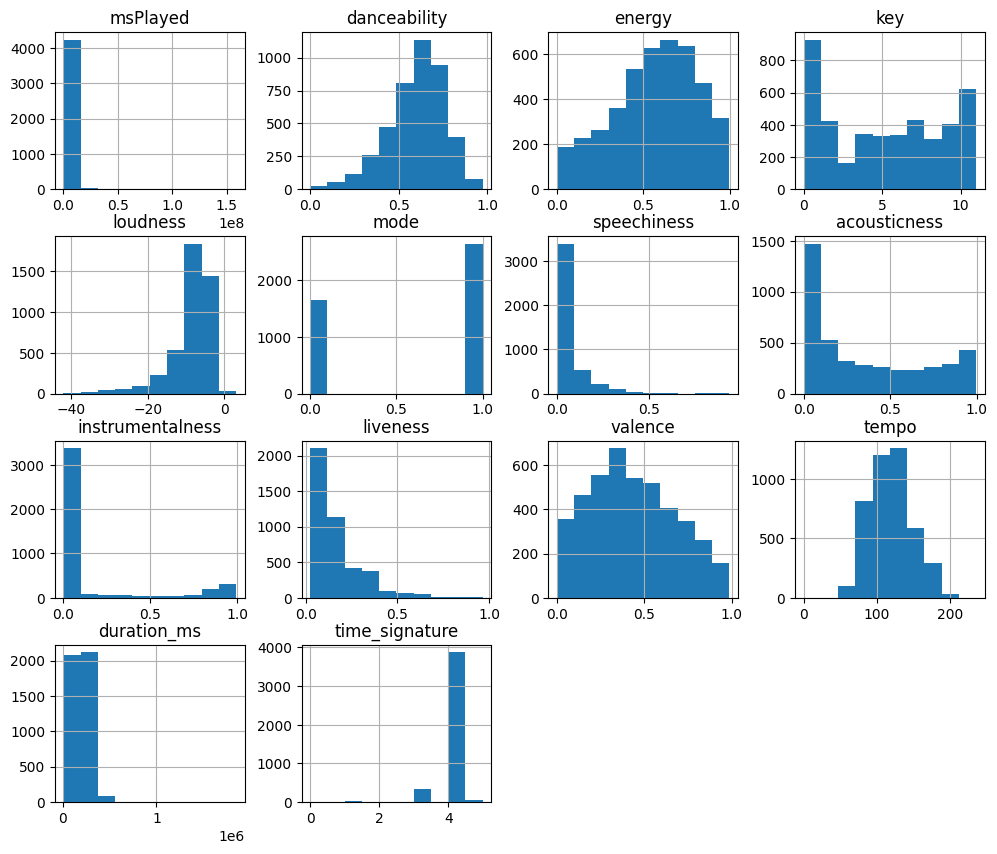

In [26]:
import matplotlib.pyplot as plt

numeric_columns = df_cleaned.select_dtypes(include=['int', 'float'])
numeric_columns.hist(figsize=(12, 10))
plt.show()


# **Correlation analysis:**

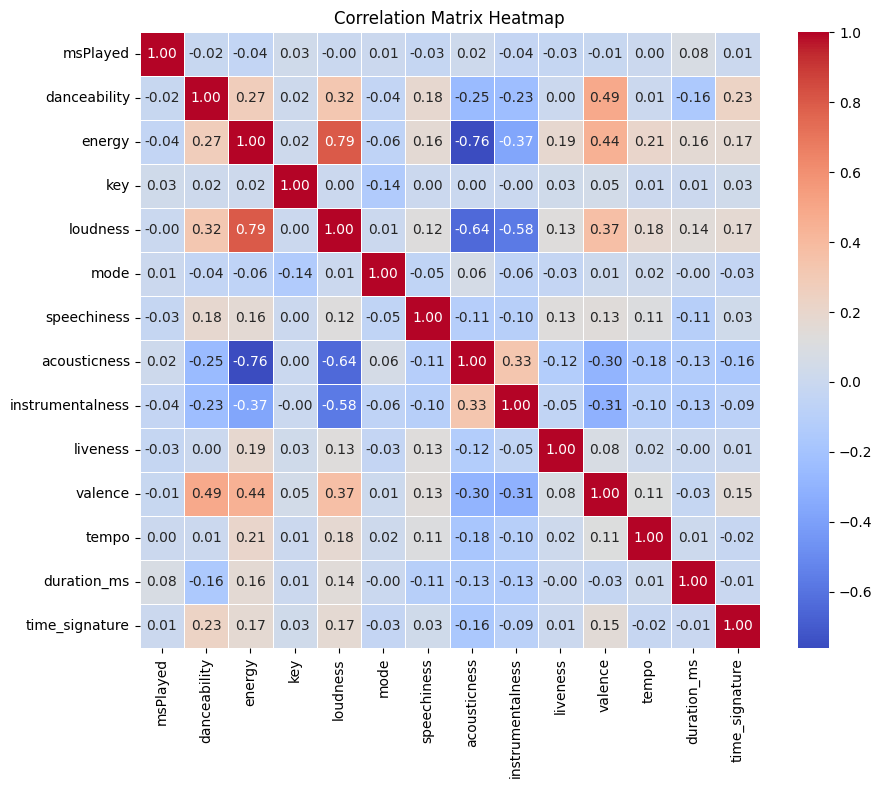

In [27]:
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add a title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()


# Code to group top 10 genres based on number of songs in each genre

In [28]:
# Group the data by genre and count the number of songs for each genre
genre_song_counts = df_cleaned['genre'].value_counts()

# Get the top 10 genres
top_10_genres = genre_song_counts.head(10)

# Display the top 10 genres
print(top_10_genres)


alt z                    328
pop                      301
filmi                    206
dance pop                 86
singer-songwriter pop     82
alternative metal         75
anime lo-fi               68
art pop                   63
drift phonk               62
brostep                   58
Name: genre, dtype: int64


# **Top 20 artists by number of songs**

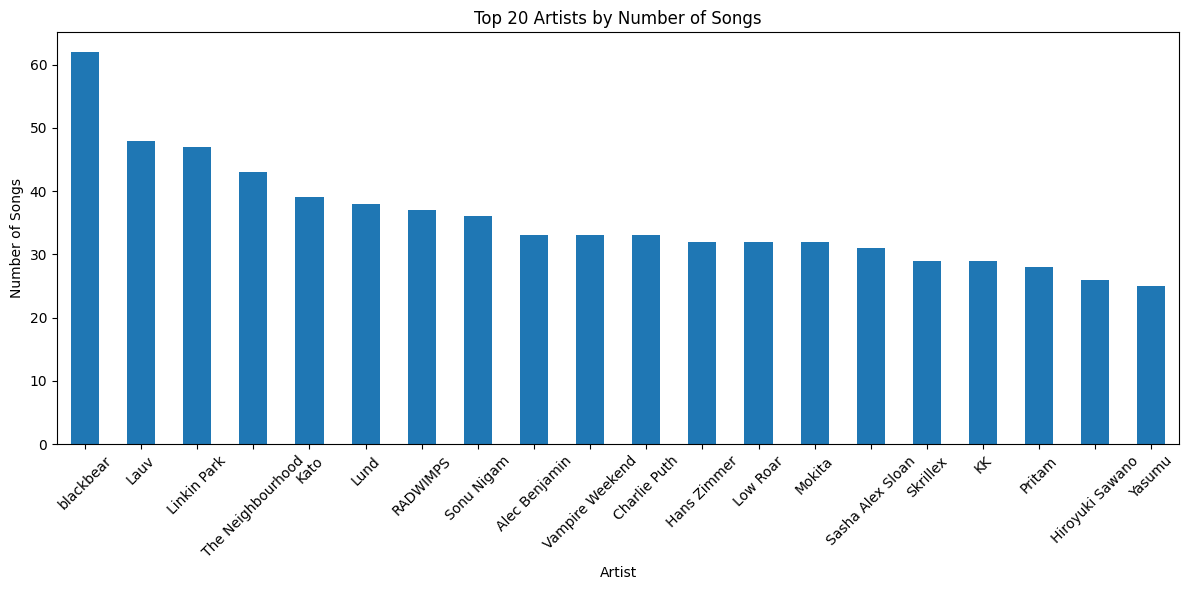

In [30]:


# Group the data by artist and count the number of songs for each artist
artist_song_counts = df_cleaned['artistName'].value_counts()

# Plot a bar graph
plt.figure(figsize=(12, 6))
artist_song_counts[:20].plot(kind='bar')  # Plot the top 20 artists, you can adjust this number as needed
plt.title('Top 20 Artists by Number of Songs')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the graph
plt.show()
#The below graph shows 20 artists with highest number of songs

##***Top  10 artist by danceability***

In [31]:
artist_danceability = df_cleaned.groupby('artistName')['danceability'].mean()

# Get the top 10 artists with the highest average danceability
top_10_artists_danceability = artist_danceability.nlargest(10)

# Display the top 10 artists with their average danceability
print(top_10_artists_danceability)

artistName
Baby Keem             0.963
Kardinal Offishall    0.949
Agar Agar             0.945
Swell                 0.944
CHROMANCE             0.940
Kayla Nicole          0.939
VTORNIK               0.936
Cardi B               0.935
Comethazine           0.934
luvbyrd               0.926
Name: danceability, dtype: float64


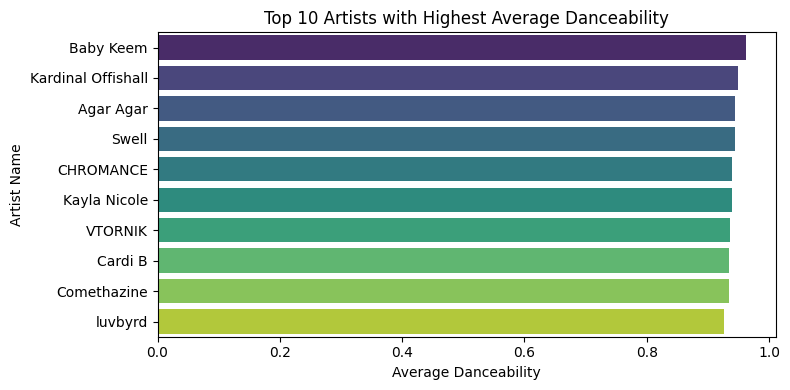

In [32]:
plt.figure(figsize=(8, 4))
sns.barplot(x=top_10_artists_danceability.values, y=top_10_artists_danceability.index, palette="viridis")
plt.xlabel('Average Danceability')
plt.ylabel('Artist Name')
plt.title('Top 10 Artists with Highest Average Danceability')
plt.tight_layout()

# Show the plot
plt.show()

##***Top 10 Most Energetic tracks***

In [35]:
top_10_energetic_tracks = df_cleaned.sort_values(by='energy', ascending=False).head(10)

# Display the top 10 most energetic tracks
print(top_10_energetic_tracks[['trackName', 'artistName', 'energy']])


                                       trackName           artistName  energy
537                            all I want is you              Rebzyyx   0.999
4765                              WITHOUT A HEAD               SPURIA   0.998
2346                               I Am Electric    Heaven's Basement   0.997
3258                NEON BLADE - Slowed + Reverb            MoonDeity   0.997
2608  Jungle Bae (feat. Bunji Garlin & MX Prime)               Jack Ü   0.997
3257                                  NEON BLADE            MoonDeity   0.996
2995                                      MORTAL           Pharmacist   0.996
351           BRAND NEW WORLD - EUROBEAT VERSION                  Ace   0.996
3223                 Murder In My Mind - Sped Up             Kordhell   0.994
3920                                   Sadi Gali  Lehmber Hussainpuri   0.994


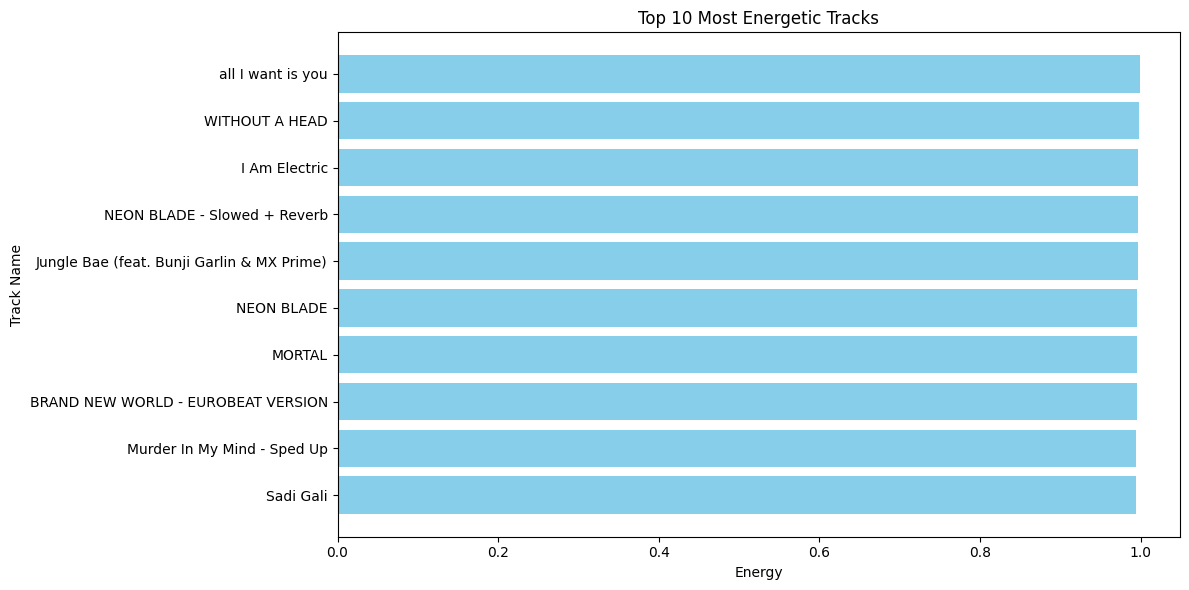

In [36]:
top_10_energetic_tracks = df_cleaned.sort_values(by='energy', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.barh(top_10_energetic_tracks['trackName'], top_10_energetic_tracks['energy'], color='skyblue')
plt.xlabel('Energy')
plt.ylabel('Track Name')
plt.title('Top 10 Most Energetic Tracks')
plt.gca().invert_yaxis()  # Reverse the order to show the most energetic at the top
plt.tight_layout()

# Show the plot
plt.show()